In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats
import networkx as nx
import os

In [2]:
import pickle
import pickle
data_dir = 'simulation_results/mut_rate/'

file_path = data_dir + 'sim_data_mut_rate_1_trial_1.pkl'
with open(file_path, 'rb') as file:
    data_1 = pickle.load(file)

file_path = data_dir + 'sim_data_mut_rate_05_trial_1.pkl'
with open(file_path, 'rb') as file:
    data_05 = pickle.load(file)

file_path = data_dir + 'sim_data_mut_rate_01_trial_1.pkl'
with open(file_path, 'rb') as file:
    data_01 = pickle.load(file)

In [3]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

V = data_1['freq_timeseries'].shape[0]
Q = data_1['freq_timeseries'].shape[1]

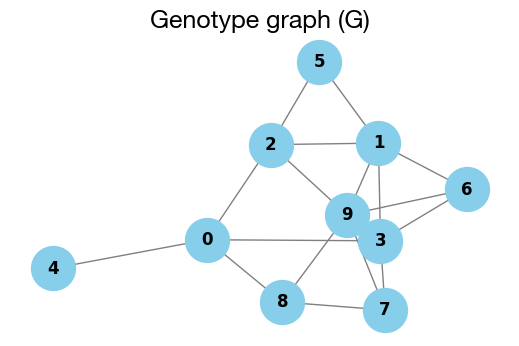

In [4]:
# show the genotype graph 

G = nx.from_numpy_array(data_1['A'])
node_labels = {i: f'{i}' for i in range(len(data_1['A']))}

plt.figure(figsize=(5, 3))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title('Genotype graph (G)')
plt.show()

In [5]:
# # show the genotype-phenotype graph 

# G = nx.from_numpy_array(data_100['A'])
# node_labels = {i: f'({i}, 0)' for i in range(len(data_100['A']))}

# new_nodes = []
# new_edges = []

# # add phenotype nodes dynamically to each genotype node in the graph
# new_node_start_index = len(G.nodes)

# for node in G.nodes:
#     for i in range(Q-1):  
#         new_node = new_node_start_index + node * (Q-1) + i
#         new_nodes.append(new_node)  # collect new node
#         new_edges.append((node, new_node))  # collect edge between parent and child

# G.add_nodes_from(new_nodes)  
# G.add_edges_from(new_edges)  

# # labels for phenotype nodes
# for child_node in new_nodes:
#     genotype_parent = child_node % len(new_nodes)
#     child_number = child_node % (Q-1) + 1
#     node_labels[child_node] = '(' + str(genotype_parent) + ', ' + str(child_number) + ')'

# # colors 
# node_colors = []
# for node in G.nodes:
#     if node < len(data_100['A']):  
#         node_colors.append('skyblue')
#     else:  
#         node_colors.append('lightgreen')

# # positioning the nodes
# pos = nx.spring_layout(G, seed=42)

# # offset the children below their parent nodes
# child_pos_offset = 0.20 
# for node in range(len(data_100['A'])):
#     children = [n for n in G.neighbors(node)]  
#     child_count = 0
#     for child in children:
#         if child >= len(data_100['A']): 
#             pos[child] = (pos[node][0], pos[node][1] - child_pos_offset * (child_count + 1))
#             child_count += 1

# plt.figure(figsize=(5, 3))
# nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color=node_colors, font_size=12, font_weight='bold', edge_color='gray')

# plt.title("Genotype-phenotype graph (G, P)")
# plt.show()

In [42]:
# plt.figure(figsize=(8, 4))

# # loop through each (genotype, phenotype) pair
# for i in range(V):  # genotypes 
#     for j in range(Q):  # phenotypes 
#         plt.plot(data_100['freq_timeseries'][i, j, :], label=f'G: {i}, P: {j}', alpha=0.7)

# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.ylim(-0.01,1.01)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()

Mutation rate

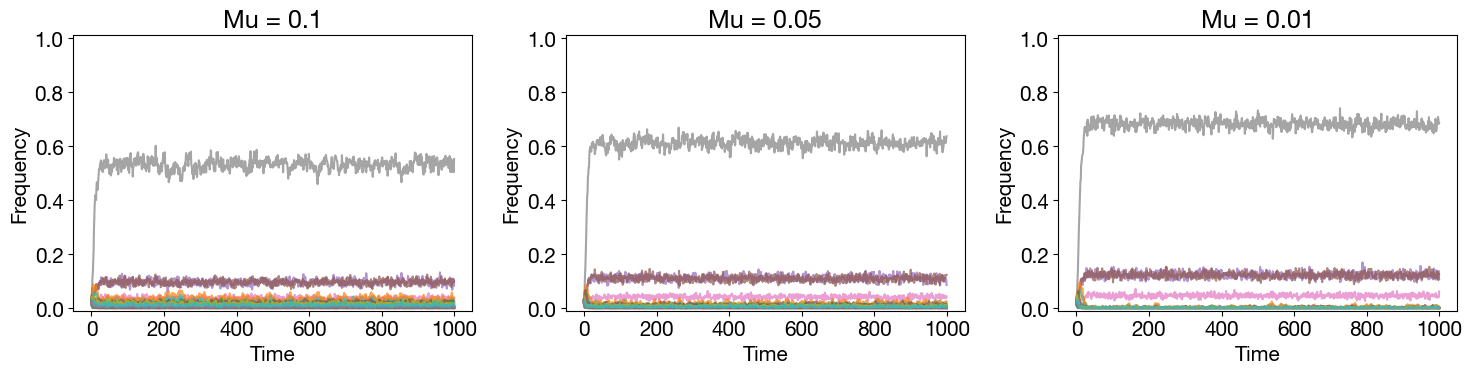

In [6]:
datasets = [data_1, data_05, data_01]

dataset_names = ['Mu = 0.1', 'Mu = 0.05', 'Mu = 0.01'] # Names for the titles of each subplot

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # 1 row, 3 columns of subplots

for index, data in enumerate(datasets):
    ax = axes[index] # Select the current subplot
    for i in range(V):  # genotypes
        for j in range(Q):  # phenotypes
            ax.plot(data['freq_timeseries'][i, j, :], label=f'G: {i}, P: {j}', alpha=0.7)

    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_ylim(-0.01, 1.01)
    ax.set_title(dataset_names[index]) # set title for each subplot

    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

/var/folders/8p/7dvyf8jj5778n86kw_n3hx2w0000gn/T/ipykernel_17617/2043556157.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(-0.01, 1.01)


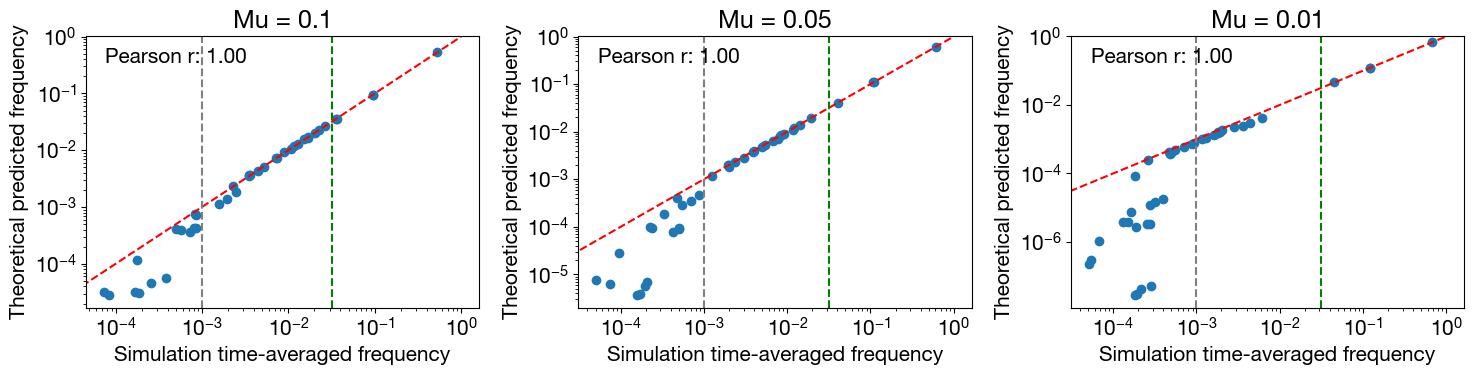

In [16]:
import scipy.stats

datasets = [data_1, data_05, data_01]

dataset_names = ['Mu = 0.1', 'Mu = 0.05', 'Mu = 0.01'] # Names for the titles of each subplot

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # 1 row, 3 columns of subplots

for index, data in enumerate(datasets):
    ax = axes[index]
    time_average = np.mean(data['freq_timeseries'], axis=2).flatten()
    theory = data['f_eq']

    ax.plot(time_average, theory, 'o')

    # compute Pearson correlation
    correlation, _ = scipy.stats.pearsonr(time_average, theory)

    # plot the line
    x = np.linspace(0, 1, 100)
    y = x
    ax.plot(x, y, color='red', linestyle='--')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.axvline(1/1000, color='gray', linestyle='--')
    ax.axvline(1/np.sqrt(1000), color='green', linestyle='--')
    ax.set_xlabel('Simulation time-averaged frequency')
    ax.set_ylabel('Theoretical predicted frequency')
    ax.set_ylim(-0.01, 1.01)
    ax.set_title(dataset_names[index]) # set title for each subplot
    ax.text(0.05, 0.9, f'Pearson r: {correlation:.2f}', transform=ax.transAxes)

plt.tight_layout()
plt.show()

In [9]:
np.mean(data_1['freq_timeseries'], axis=2)

array([[8.43000e-04, 2.49300e-03, 1.94700e-03, 1.57500e-03],
       [9.45930e-02, 9.49420e-02, 3.54970e-02, 5.26855e-01],
       [2.23950e-02, 2.68270e-02, 8.30000e-04, 3.61280e-02],
       [1.69040e-02, 4.40200e-03, 3.63900e-03, 3.54600e-03],
       [1.66000e-04, 3.84000e-04, 2.57000e-04, 1.86000e-04],
       [1.53250e-02, 3.48200e-03, 7.43600e-03, 8.95700e-03],
       [1.15220e-02, 2.00710e-02, 5.17500e-03, 1.28850e-02],
       [5.65000e-04, 7.30000e-05, 5.07000e-04, 1.75000e-04],
       [8.50000e-05, 8.04000e-04, 8.46000e-04, 7.22000e-04],
       [7.23300e-03, 2.28400e-03, 1.66640e-02, 1.07800e-02]])

In [10]:
np.mean(data_05['freq_timeseries'], axis=2)

array([[3.35000e-04, 8.84000e-04, 6.97000e-04, 5.49000e-04],
       [1.10145e-01, 1.08391e-01, 4.03070e-02, 6.06473e-01],
       [1.20830e-02, 1.44340e-02, 4.81000e-04, 1.93790e-02],
       [9.22300e-03, 2.38800e-03, 1.93200e-03, 2.02100e-03],
       [1.73000e-04, 2.08000e-04, 1.98000e-04, 1.56000e-04],
       [8.24600e-03, 1.98800e-03, 4.03300e-03, 5.02200e-03],
       [6.79400e-03, 1.16120e-02, 3.03300e-03, 7.71500e-03],
       [2.39000e-04, 5.10000e-05, 2.26000e-04, 9.50000e-05],
       [7.50000e-05, 5.04000e-04, 4.96000e-04, 4.28000e-04],
       [3.86100e-03, 1.24200e-03, 8.48800e-03, 5.39500e-03]])

In [11]:
np.mean(data_01['freq_timeseries'], axis=2)

array([[1.65000e-04, 4.01000e-04, 3.17000e-04, 2.78000e-04],
       [1.21470e-01, 1.21269e-01, 4.52470e-02, 6.75171e-01],
       [3.58900e-03, 4.42300e-03, 1.81000e-04, 6.10900e-03],
       [2.02000e-03, 5.57000e-04, 5.00000e-04, 4.70000e-04],
       [1.96000e-04, 2.86000e-04, 2.19000e-04, 1.85000e-04],
       [1.82800e-03, 4.87000e-04, 9.41000e-04, 1.17300e-03],
       [1.60800e-03, 2.84500e-03, 7.11000e-04, 1.81200e-03],
       [1.49000e-04, 5.50000e-05, 1.31000e-04, 6.80000e-05],
       [5.10000e-05, 2.54000e-04, 2.80000e-04, 1.87000e-04],
       [8.95000e-04, 2.64000e-04, 1.90300e-03, 1.30500e-03]])

In [12]:
data_1['f_eq']

array([7.18121209e-04, 1.82284373e-03, 1.40348216e-03, 1.14783259e-03,
       9.54151324e-02, 9.54003814e-02, 3.55217526e-02, 5.29720752e-01,
       2.23181719e-02, 2.62892877e-02, 7.64260205e-04, 3.60107706e-02,
       1.69541355e-02, 4.32465358e-03, 3.70318022e-03, 3.73535034e-03,
       3.24326208e-05, 5.59397215e-05, 4.60459036e-05, 3.10454070e-05,
       1.54640097e-02, 3.52557688e-03, 7.38368279e-03, 9.25945299e-03,
       1.16391393e-02, 2.00380922e-02, 5.09577706e-03, 1.31235259e-02,
       4.01429440e-04, 3.14755311e-05, 4.11681958e-04, 1.15549831e-04,
       2.87638118e-05, 4.19567972e-04, 4.26972757e-04, 3.57448420e-04,
       7.35505914e-03, 2.35834440e-03, 1.65211651e-02, 1.06277127e-02])

In [13]:
data_05['f_eq']

array([1.81842580e-04, 4.61580306e-04, 3.55389611e-04, 2.90654053e-04,
       1.10169627e-01, 1.10152595e-01, 4.10146496e-02, 6.11633983e-01,
       1.19441926e-02, 1.40694461e-02, 4.09015180e-04, 1.92721690e-02,
       8.97723797e-03, 2.28991000e-03, 1.96083901e-03, 1.97787313e-03,
       3.92955620e-06, 6.77769092e-06, 5.57894988e-06, 3.76148053e-06,
       8.07632634e-03, 1.84128890e-03, 3.85624639e-03, 4.83589737e-03,
       6.31677468e-03, 1.08750407e-02, 2.76557181e-03, 7.12237856e-03,
       9.64879220e-05, 7.56548545e-06, 9.89522260e-05, 2.77736558e-05,
       6.30525350e-06, 9.19725956e-05, 9.35957826e-05, 7.83555018e-05,
       3.71689144e-03, 1.19179329e-03, 8.34899843e-03, 5.37073239e-03])